# Batch Normalization - Image Data

## Giới thiệu

Batch Normalization là một kỹ thuật normalization được áp dụng trên batch dimension. Đối với dữ liệu ảnh, thường có shape (batch, channels, height, width).

Batch Normalization sẽ normalize theo:
- Mean và variance được tính trên batch dimension và spatial dimensions (height, width)
- Chỉ giữ lại channel dimension

## Công thức

```
mean = mean(x, dim=(0, 2, 3))  # Tính mean theo batch và spatial dims
var = var(x, dim=(0, 2, 3))    # Tính variance theo batch và spatial dims
x_norm = (x - mean) / sqrt(var + eps)
output = gamma * x_norm + beta
```

Trong đó:
- gamma: learnable scale parameter (một cho mỗi channel)
- beta: learnable shift parameter (một cho mỗi channel)
- eps: small constant để tránh chia cho 0


In [5]:
import numpy as np
import matplotlib.pyplot as plt

class BatchNorm2D:
    """
    Batch Normalization cho 2D image data (4D tensor: batch, channels, height, width)
    """
    def __init__(self, num_channels, eps=1e-5, momentum=0.1):
        self.num_channels = num_channels
        self.eps = eps
        self.momentum = momentum
        
        # Learnable parameters
        self.gamma = np.ones(num_channels)  # Scale
        self.beta = np.zeros(num_channels)  # Shift
        
        # Running statistics (for inference)
        self.running_mean = np.zeros(num_channels)
        self.running_var = np.ones(num_channels)
        
    def forward(self, x, training=True):
        """
        x shape: (batch, channels, height, width)
        """
        if training:
            # Tính mean và var theo batch và spatial dimensions
            # Keep dims: channels
            mean = np.mean(x, axis=(0, 2, 3), keepdims=True)
            var = np.var(x, axis=(0, 2, 3), keepdims=True)
            
            # Update running statistics
            self.running_mean = (1 - self.momentum) * self.running_mean + self.momentum * np.squeeze(mean)
            self.running_var = (1 - self.momentum) * self.running_var + self.momentum * np.squeeze(var)
        else:
            # Sử dụng running statistics trong inference
            mean = self.running_mean.reshape(1, -1, 1, 1)
            var = self.running_var.reshape(1, -1, 1, 1)
        
        # Normalize
        x_norm = (x - mean) / np.sqrt(var + self.eps)
        
        # Scale and shift
        gamma = self.gamma.reshape(1, -1, 1, 1)
        beta = self.beta.reshape(1, -1, 1, 1)
        output = gamma * x_norm + beta
        
        return output

print("BatchNorm2D class đã được định nghĩa!")


BatchNorm2D class đã được định nghĩa!


## Ví dụ 1: 1 Sample, 1 Kernel (Channel)

Shape: (1, 1, 4, 4) - 1 batch, 1 channel, 4x4 image


Input shape: (1, 1, 4, 4)
Input data:
[[  9.96714153   3.61735699  11.47688538  20.23029856]
 [  2.65846625   2.65863043  20.79212816  12.67434729]
 [  0.30525614  10.42560044   0.36582307   0.34270246]
 [  7.41962272 -14.13280245 -12.24917833  -0.62287529]]

Input mean: 4.7456
Input std: 9.4022

Output shape: (1, 1, 4, 4)
Output data:
[[ 0.55535368 -0.11999629  0.71592692  1.64692188]
 [-0.22198193 -0.22196447  1.70667691  0.8432865 ]
 [-0.4722645   0.60411443 -0.46582272 -0.46828178]
 [ 0.28440484 -2.0078666  -1.80752823 -0.57097864]]

Output mean: 0.0000
Output std: 1.0000


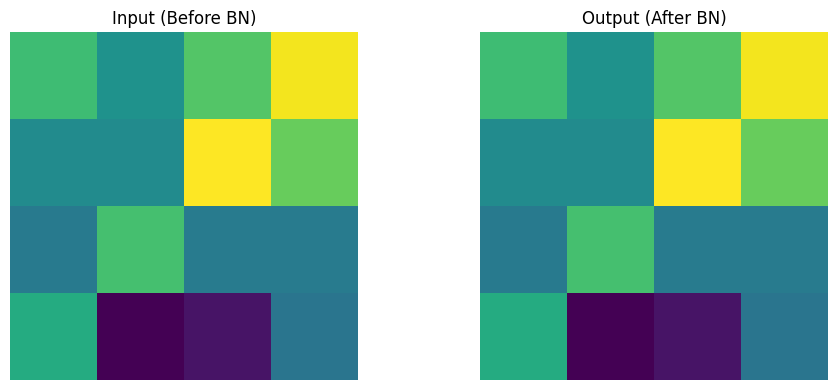

In [6]:
# Ví dụ 1: 1 Sample, 1 Kernel
np.random.seed(42)
x1 = np.random.randn(1, 1, 4, 4) * 10 + 5  # 1 batch, 1 channel, 4x4
print(f"Input shape: {x1.shape}")
print(f"Input data:\n{x1[0, 0]}")
print(f"\nInput mean: {np.mean(x1):.4f}")
print(f"Input std: {np.std(x1):.4f}")

# Khởi tạo BatchNorm
bn1 = BatchNorm2D(num_channels=1)

# Forward pass
output1 = bn1.forward(x1, training=True)
print(f"\nOutput shape: {output1.shape}")
print(f"Output data:\n{output1[0, 0]}")
print(f"\nOutput mean: {np.mean(output1):.4f}")
print(f"Output std: {np.std(output1):.4f}")

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].imshow(x1[0, 0], cmap='viridis')
axes[0].set_title('Input (Before BN)')
axes[0].axis('off')

axes[1].imshow(output1[0, 0], cmap='viridis')
axes[1].set_title('Output (After BN)')
axes[1].axis('off')
plt.tight_layout()
plt.show()


Input shape: (1, 2, 4, 4)

Channel 0 mean: 4.7456, std: 9.4022
Channel 1 mean: 2.5083, std: 9.0820

Output shape: (1, 2, 4, 4)

Channel 0 - Output mean: 0.0000, std: 1.0000
Channel 1 - Output mean: 0.0000, std: 1.0000


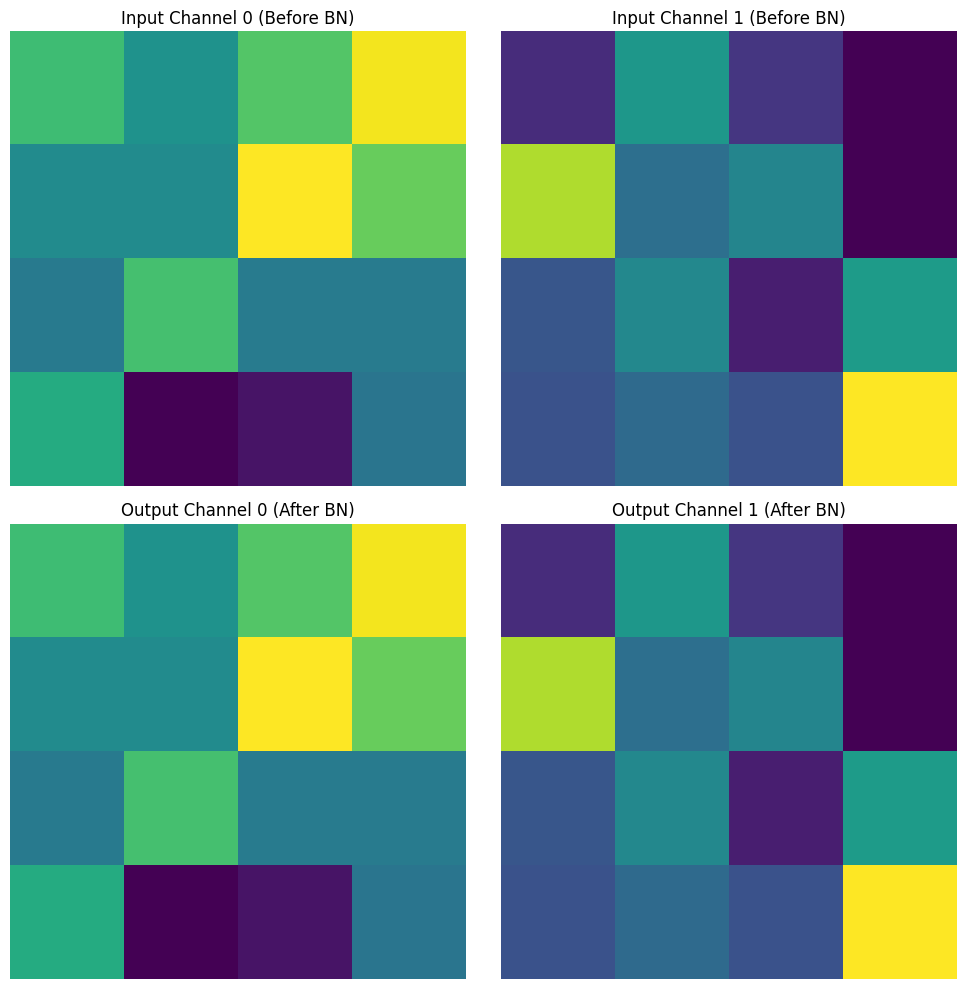

In [7]:
# Ví dụ 2: 1 Sample, 2 Kernels
np.random.seed(42)
x2 = np.random.randn(1, 2, 4, 4) * 10 + 5  # 1 batch, 2 channels, 4x4
print(f"Input shape: {x2.shape}")
print(f"\nChannel 0 mean: {np.mean(x2[0, 0]):.4f}, std: {np.std(x2[0, 0]):.4f}")
print(f"Channel 1 mean: {np.mean(x2[0, 1]):.4f}, std: {np.std(x2[0, 1]):.4f}")

# Khởi tạo BatchNorm với 2 channels
bn2 = BatchNorm2D(num_channels=2)

# Forward pass
output2 = bn2.forward(x2, training=True)
print(f"\nOutput shape: {output2.shape}")
print(f"\nChannel 0 - Output mean: {np.mean(output2[0, 0]):.4f}, std: {np.std(output2[0, 0]):.4f}")
print(f"Channel 1 - Output mean: {np.mean(output2[0, 1]):.4f}, std: {np.std(output2[0, 1]):.4f}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(x2[0, 0], cmap='viridis')
axes[0, 0].set_title('Input Channel 0 (Before BN)')
axes[0, 0].axis('off')

axes[0, 1].imshow(x2[0, 1], cmap='viridis')
axes[0, 1].set_title('Input Channel 1 (Before BN)')
axes[0, 1].axis('off')

axes[1, 0].imshow(output2[0, 0], cmap='viridis')
axes[1, 0].set_title('Output Channel 0 (After BN)')
axes[1, 0].axis('off')

axes[1, 1].imshow(output2[0, 1], cmap='viridis')
axes[1, 1].set_title('Output Channel 1 (After BN)')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 3: 2 Samples, 1 Kernel (Channel)

Shape: (2, 1, 4, 4) - 2 batches, 1 channel, 4x4 image

Trong trường hợp này, BatchNorm sẽ tính mean và variance trên cả 2 samples trong batch.


Input shape: (2, 1, 4, 4)

Sample 0 mean: 4.7456, std: 9.4022
Sample 1 mean: 2.5083, std: 9.0820
Overall mean (across batch): 3.6269, std: 9.3109

Output shape: (2, 1, 4, 4)

Sample 0 - Output mean: 0.1201, std: 1.0098
Sample 1 - Output mean: -0.1201, std: 0.9754
Overall output mean: -0.0000, std: 1.0000


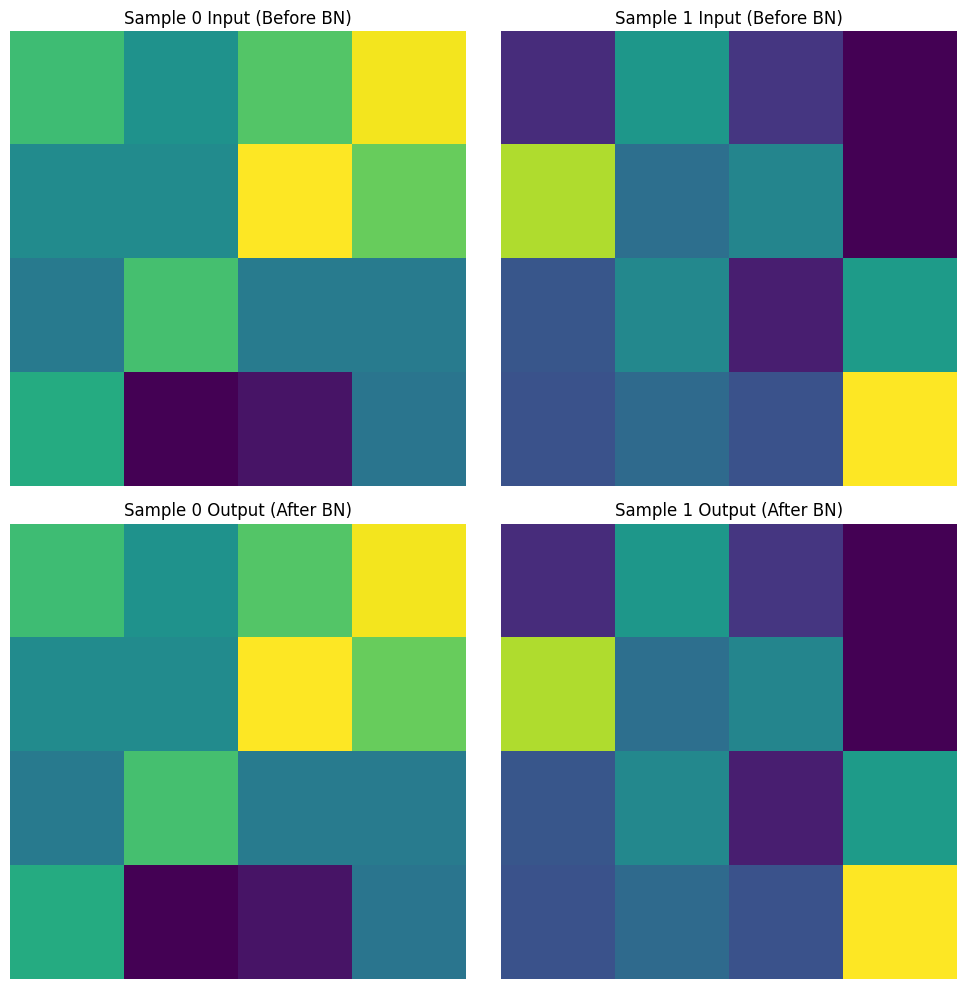

In [8]:
# Ví dụ 3: 2 Samples, 1 Kernel
np.random.seed(42)
x3 = np.random.randn(2, 1, 4, 4) * 10 + 5  # 2 batches, 1 channel, 4x4
print(f"Input shape: {x3.shape}")
print(f"\nSample 0 mean: {np.mean(x3[0]):.4f}, std: {np.std(x3[0]):.4f}")
print(f"Sample 1 mean: {np.mean(x3[1]):.4f}, std: {np.std(x3[1]):.4f}")
print(f"Overall mean (across batch): {np.mean(x3):.4f}, std: {np.std(x3):.4f}")

# Khởi tạo BatchNorm
bn3 = BatchNorm2D(num_channels=1)

# Forward pass
output3 = bn3.forward(x3, training=True)
print(f"\nOutput shape: {output3.shape}")
print(f"\nSample 0 - Output mean: {np.mean(output3[0]):.4f}, std: {np.std(output3[0]):.4f}")
print(f"Sample 1 - Output mean: {np.mean(output3[1]):.4f}, std: {np.std(output3[1]):.4f}")
print(f"Overall output mean: {np.mean(output3):.4f}, std: {np.std(output3):.4f}")

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].imshow(x3[0, 0], cmap='viridis')
axes[0, 0].set_title('Sample 0 Input (Before BN)')
axes[0, 0].axis('off')

axes[0, 1].imshow(x3[1, 0], cmap='viridis')
axes[0, 1].set_title('Sample 1 Input (Before BN)')
axes[0, 1].axis('off')

axes[1, 0].imshow(output3[0, 0], cmap='viridis')
axes[1, 0].set_title('Sample 0 Output (After BN)')
axes[1, 0].axis('off')

axes[1, 1].imshow(output3[1, 0], cmap='viridis')
axes[1, 1].set_title('Sample 1 Output (After BN)')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


## Ví dụ 4: 2 Samples, 2 Kernels (Channels)

Shape: (2, 2, 4, 4) - 2 batches, 2 channels, 4x4 image

Đây là trường hợp đầy đủ nhất với nhiều samples và nhiều channels.


Input shape: (2, 2, 4, 4)
Sample 0, Channel 0 - mean: 4.7456, std: 9.4022
Sample 0, Channel 1 - mean: 2.5083, std: 9.0820
Sample 1, Channel 0 - mean: 1.5872, std: 8.5957
Sample 1, Channel 1 - mean: 3.5048, std: 8.1643

Output shape: (2, 2, 4, 4)
Sample 0, Channel 0 - Output mean: 0.1727, std: 1.0281
Sample 0, Channel 1 - Output mean: -0.0576, std: 1.0500
Sample 1, Channel 0 - Output mean: -0.1727, std: 0.9399
Sample 1, Channel 1 - Output mean: 0.0576, std: 0.9439


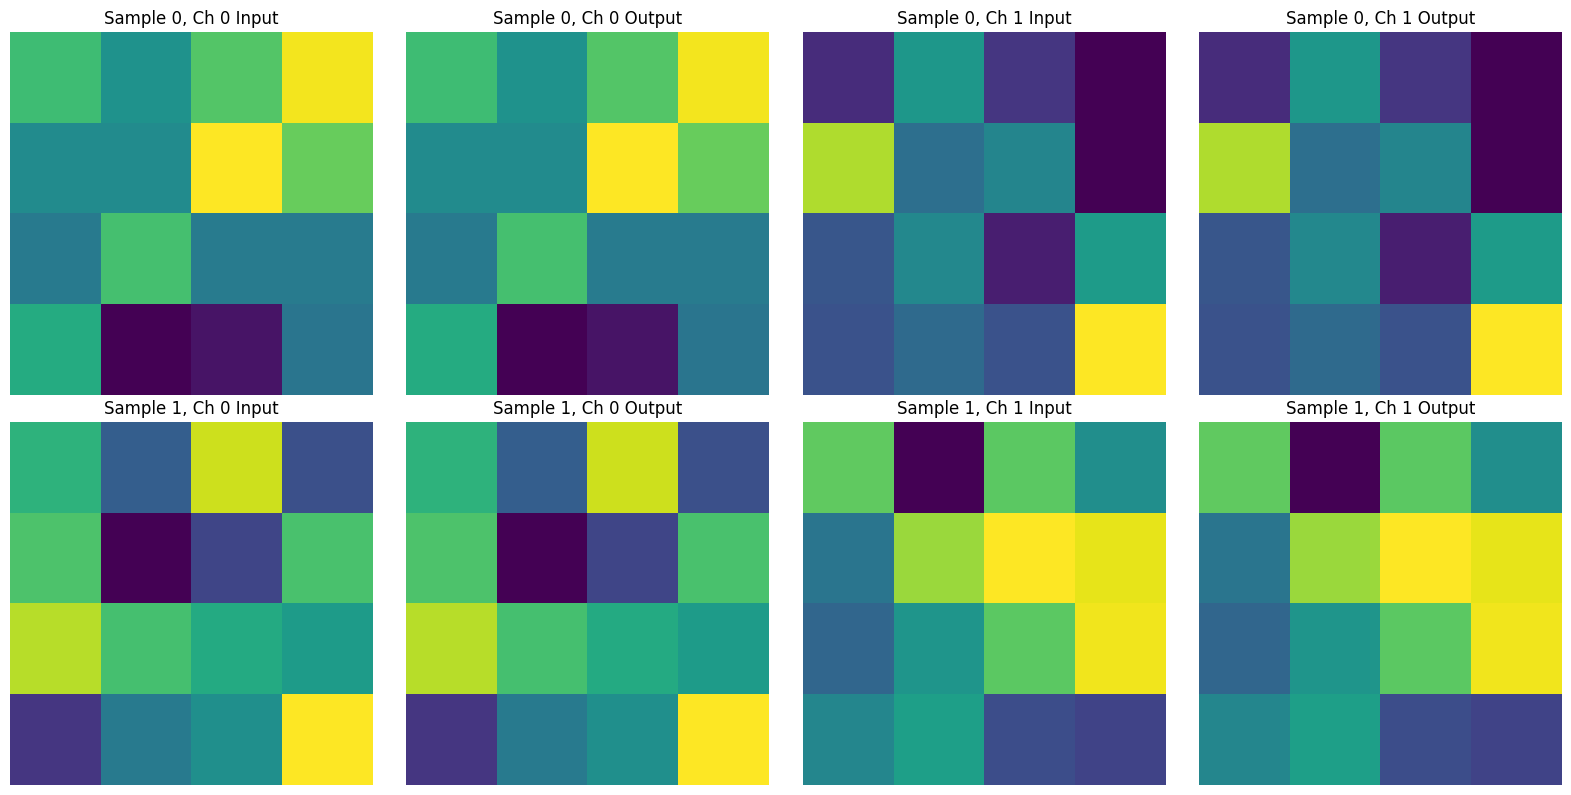

In [9]:
# Ví dụ 4: 2 Samples, 2 Kernels
np.random.seed(42)
x4 = np.random.randn(2, 2, 4, 4) * 10 + 5  # 2 batches, 2 channels, 4x4
print(f"Input shape: {x4.shape}")

for b in range(2):
    for c in range(2):
        print(f"Sample {b}, Channel {c} - mean: {np.mean(x4[b, c]):.4f}, std: {np.std(x4[b, c]):.4f}")

# Khởi tạo BatchNorm với 2 channels
bn4 = BatchNorm2D(num_channels=2)

# Forward pass
output4 = bn4.forward(x4, training=True)
print(f"\nOutput shape: {output4.shape}")

for b in range(2):
    for c in range(2):
        print(f"Sample {b}, Channel {c} - Output mean: {np.mean(output4[b, c]):.4f}, std: {np.std(output4[b, c]):.4f}")

# Visualize
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for b in range(2):
    for c in range(2):
        axes[b, c*2].imshow(x4[b, c], cmap='viridis')
        axes[b, c*2].set_title(f'Sample {b}, Ch {c} Input')
        axes[b, c*2].axis('off')
        
        axes[b, c*2+1].imshow(output4[b, c], cmap='viridis')
        axes[b, c*2+1].set_title(f'Sample {b}, Ch {c} Output')
        axes[b, c*2+1].axis('off')

plt.tight_layout()
plt.show()
